# Using `rrccml` For Neural Networks

## Step 1: Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rrccml.Neural_Net import network as net
from rrccml.Neural_Net import layer as lyr
from rrccml.Neural_Net import activation as act_fun

## Step 2: Read and Clean Data

In [2]:
# COPIED FROM ADAMS LECTURE TODAY

# Original data
DATA = pd.read_csv("Iris.csv")#, names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'] )
DATA = DATA[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
DATA.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Make an index for different binary categories .
mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica" : 1}

# Map Setosa to -1 and the two other flowers to 1.
DATA['Species'] = [mapping[item] for item in DATA['Species']]

DATA = DATA.sample(frac=1)

X = DATA[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = DATA[['Species']]

X_train = X.iloc[ : 100] 
Y_train = Y.iloc[ : 100]

X_test = X.iloc[100 : ]
Y_test = Y.iloc[100 : ]

## Step 3: Define Error Function

In [4]:
def error_func(actual, expected):
    return (actual - expected)

## Step 4: Initialize Network with Data

In [67]:
iris_net = net.Network(X_train, Y_train)

## Step 5: Add Layers

In [68]:
# Hidden Layer 1
iris_net.add_layer(lyr.Connected(10))

# Hidden Layer 2
iris_net.add_layer(lyr.Connected(3))

# Output Layer
iris_net.add_layer(lyr.Connected(1))

## Step 6: Train the Network

In [77]:
iris_net.compile()

# NOTE x_val, y_val, and eval_function are all just place holders for now AND DO NOTHING
iris_net.train(x_val=1, y_val=1, epochs=5000, cost_function=error_func, eval_function=None, learning_rate=.1)
print("This print is here because the train function returns a diagnostic and I don't want it to print here.")

This print is here because the train function returns a diagnostic and I don't want it to print here.


## Step 7: Summarise Process

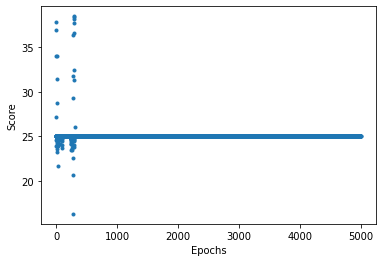

In [78]:
# COPIED FROM ADAMS LECTURE TODAY
history = np.array(iris_net.history)

plt.scatter(history[:, 0], history[:, 1], marker='.')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.show()

In [79]:
W1,W2,W3 = iris_net.get_weights()

In [80]:
error = 0
for x,y in zip(np.array(X_test), np.array(Y_test)):
    prediction = act_fun.s(np.dot(act_fun.s(np.dot(act_fun.s(np.dot(x,W1)),W2)),W3))
    error += np.round(np.abs(prediction -  y))
    
print(f"Got {error} wrong out of {len(Y_test)}")
print(100 * (len(Y_test) - error)/len(Y_test),"%")

Got [11.] wrong out of 50
[78.] %
